In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
Mydata=pd.read_csv('hour.csv',delimiter=",")
Mydata.head()
%matplotlib inline

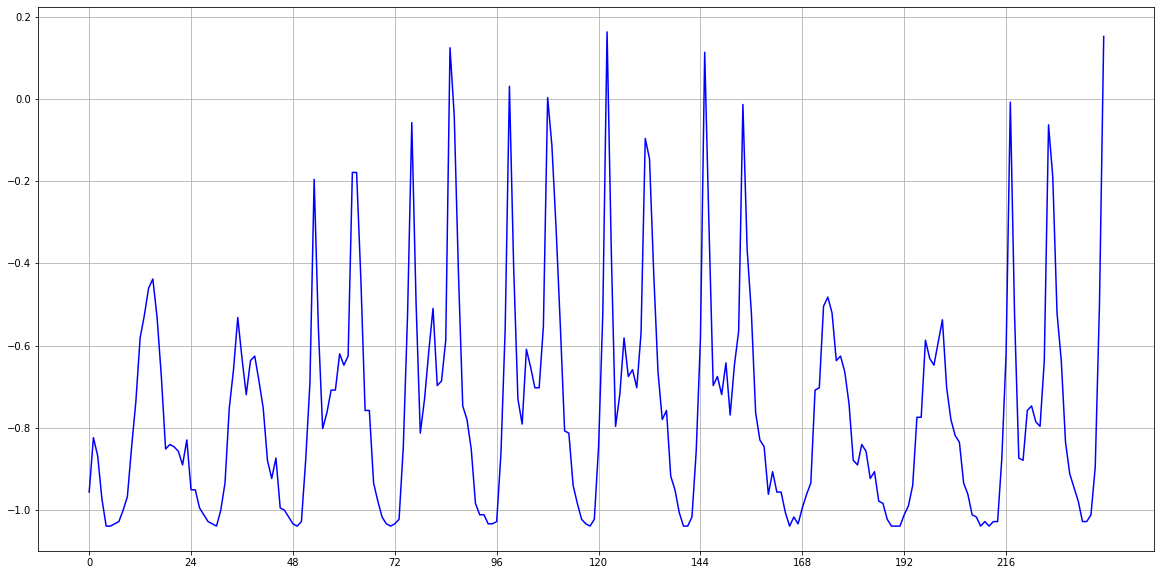

In [218]:
t=np.arange(240)
plt.figure(figsize=(20,10))
plt.plot(t,y[:240],'b-')
plt.xticks(np.arange(0,240,24))
plt.grid(True)
plt.show()

In [219]:
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(Mydata[each], prefix=each, drop_first=False)
    Mydata = pd.concat([Mydata, dummies], axis=1)

fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = Mydata.drop(fields_to_drop, axis=1)
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [220]:
#Scaling target variables
quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

In [221]:
target_field = ['casual', 'registered', 'cnt']
X, y = data.drop(target_field, axis=1), data[target_field]
y=y['cnt']
#Split the dataset into train and test data
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
np.shape(X_train)

(13903, 56)

In [222]:
y_train.shape

(13903,)

In [208]:
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential() # Initialising the ANN

classifier.add(Dense(units =56 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 56))
classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = None))

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 20, epochs = 40)

Epoch 1/40
13903/13903 [==============================] - 1s 97us/step - loss: -0.0361 - accuracy: 0.0000e+00
Epoch 2/40
13903/13903 [==============================] - 1s 78us/step - loss: -0.0361 - accuracy: 0.0000e+00
Epoch 3/40
13903/13903 [==============================] - 1s 79us/step - loss: -0.0361 - accuracy: 0.0000e+00
Epoch 4/40
13903/13903 [==============================] - 1s 85us/step - loss: -0.0361 - accuracy: 0.0000e+00
Epoch 5/40
13903/13903 [==============================] - 1s 99us/step - loss: -0.0361 - accuracy: 0.0000e+00
Epoch 6/40
13903/13903 [==============================] - 1s 88us/step - loss: -0.0361 - accuracy: 0.0000e+00
Epoch 7/40
13903/13903 [==============================] - 1s 99us/step - loss: -0.0361 - accuracy: 0.0000e+00
Epoch 8/40
13903/13903 [==============================] - 1s 81us/step - loss: -0.0361 - accuracy: 0.0000e+00
Epoch 9/40
13903/13903 [==============================] - 1s 84us/step - loss: -0.0361 - accuracy: 0.0000e+00
Epoch 10/4

In [210]:
from keras.models import load_model
classifier.save('MySolution.h5') #Save trained ANN

In [211]:
#Making Predictions
y_pred = classifier.predict(X_test)

In [212]:
y_pred.shape

(3476, 1)

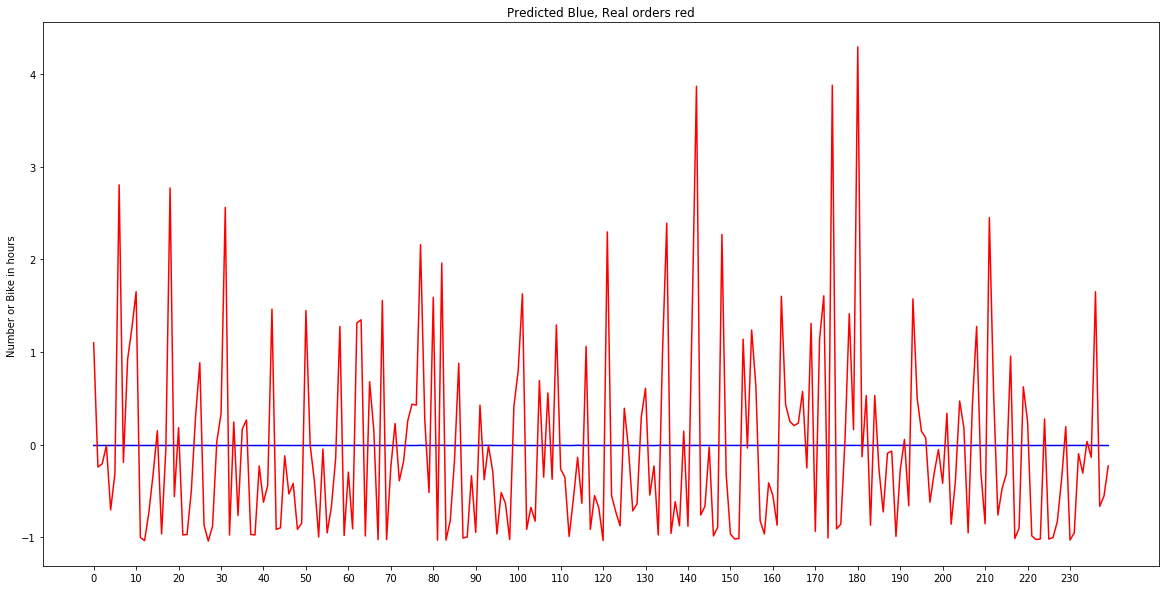

In [213]:
t=np.arange(240)
plt.figure(figsize=(20,10))
plt.ylabel('Number or Bike in hours ')
plt.title('Predicted Blue, Real orders red')
plt.plot(t,y_pred[:240],'b-',t,y_test[:240],'r-')
plt.xticks(np.arange(0,240,10))
plt.show()

In [214]:
def MSERR(Y,predict): 
    dis=[]
    for i in range(len(Y)):
        dis.append((Y[i]-predict[i])**2) #numpy np is just for array
    print('Mean Squar Error is = ',np.mean(dis))

In [215]:
y_test=np.array(y_test)
y_pred.shape


(3476, 1)

In [216]:
MSERR(y_test,y_pred)

Mean Squar Error is =  1.0138973
